### Time Series Forecasting

- Auto Regression: Time based trend over long term
- Moving Average: Current or recent data

- ARIMA (Auto Regression Integrated Moving Average)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('tesla.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Date']= pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [9]:
df.index = df['Date']

In [10]:
time_data = df['Close']
time_data

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2017-03-13    246.169998
2017-03-14    258.000000
2017-03-15    255.729996
2017-03-16    262.049988
2017-03-17    261.500000
Name: Close, Length: 1692, dtype: float64

In [11]:
train = time_data[:1200]
test = time_data[1200:]

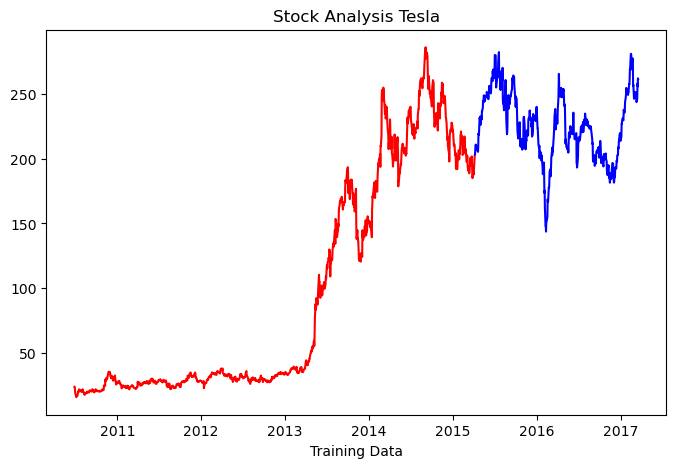

In [12]:
plt.figure(figsize= (8,5))
plt.plot(train, color='r')
plt.plot(test, color='b')
plt.xlabel('Training Data')
plt.title('Stock Analysis Tesla')
plt.show()

In [13]:
rollmean = train.rolling(12).mean()
rollstd = train.rolling(12).std()
rollstd

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
                ...   
2015-03-30    5.124457
2015-03-31    5.115064
2015-04-01    5.480100
2015-04-02    5.536096
2015-04-06    5.848561
Name: Close, Length: 1200, dtype: float64

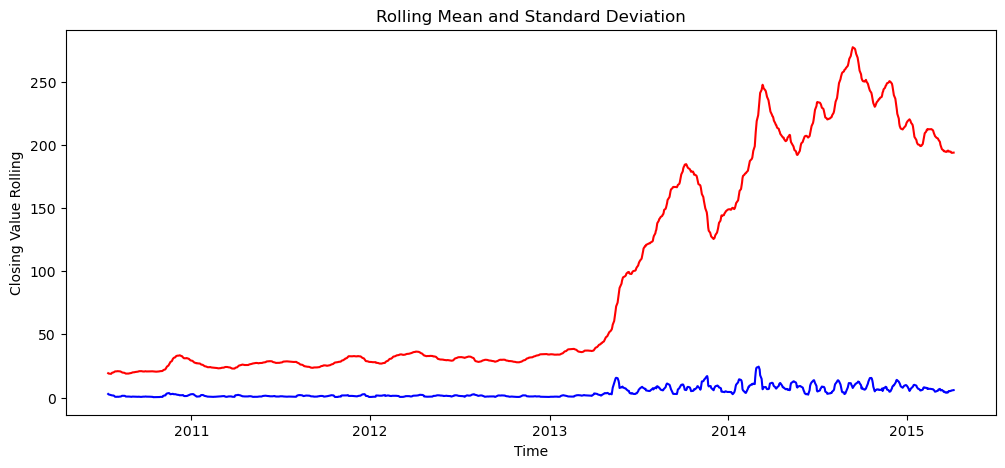

In [14]:
plt.figure(figsize=(12,5))
plt.plot(rollmean, color='r')
plt.plot(rollstd, color='b')
plt.xlabel('Time')
plt.ylabel("Closing Value Rolling")
plt.title("Rolling Mean and Standard Deviation")
plt.show()

Null Hypothesis: There is no stationarity
Alternative Hypothesis: There is stationarity
P value: 0.8924681748256664
Accept the Null Hypothesis
There is no stationarity in data


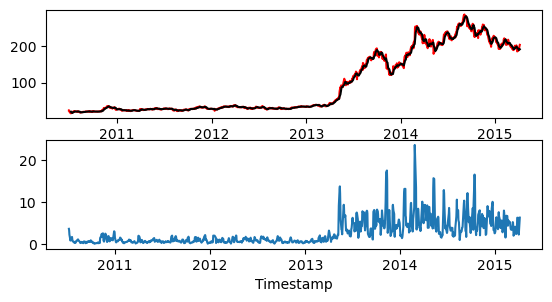

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(data):
    result = adfuller(data)
    print("Null Hypothesis: There is no stationarity")
    print("Alternative Hypothesis: There is stationarity")
    print("P value:", result[1])
    if result[1]<0.05:
        print("Reject the Null Hypothesis:")
        print("There is stationarity in the data")
    else:
        print("Accept the Null Hypothesis")
        print("There is no stationarity in data")
        
    rollmean = data.rolling(6).mean()
    rollstd = data.rolling(6).std()
    plt.subplot(3,1,2)
    plt.plot(data, color ='r')
    plt.plot(rollmean, color='black')
    #plt.ylabel("Closing Value Rolling Mean")
    
    
    plt.subplot(3,1,3)
    plt.plot(rollstd)
    plt.xlabel("Timestamp")
    #plt.ylabel("Closing Value Rolling Standard Deviation")
    plt.show()
    
test_stationarity(train)

### Differencing Method

In [17]:
differenced= train.diff().dropna()
differenced

Date
2010-06-30    -0.059999
2010-07-01    -1.870001
2010-07-02    -2.759998
2010-07-06    -3.090000
2010-07-07    -0.310001
                ...    
2015-03-30     5.570007
2015-03-31    -1.800003
2015-04-01    -1.180008
2015-04-02     3.410004
2015-04-06    12.100006
Name: Close, Length: 1199, dtype: float64

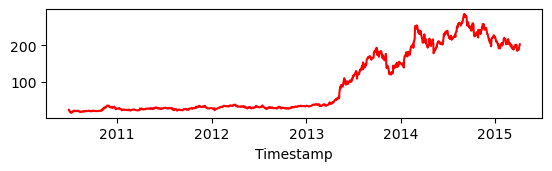

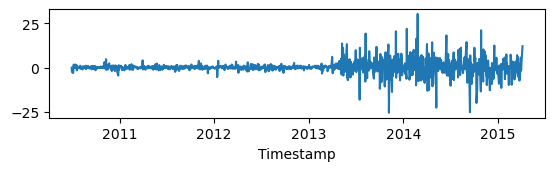

In [18]:
plt.subplot(3,1,3)
plt.plot(train, color='r')
plt.xlabel("Timestamp")
#plt.ylabel("Closing Value Rolling Standard Deviation")
plt.show()
plt.subplot(3,1,3)
plt.plot(differenced)
plt.xlabel("Timestamp")
#plt.ylabel("Closing Value Rolling Standard Deviation")
plt.show()

Null Hypothesis: There is no stationarity
Alternative Hypothesis: There is stationarity
P value: 0.0
Reject the Null Hypothesis:
There is stationarity in the data


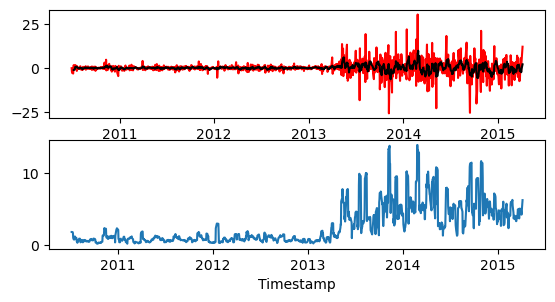

In [19]:
test_stationarity(differenced)

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
train = train.asfreq("D")
train = train.fillna(method = 'ffill')
log_data = np.log(train)
decomposition = seasonal_decompose(log_data, model ='additive')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1972\981579940.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train = train.fillna(method = 'ffill')


In [21]:
trend= decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

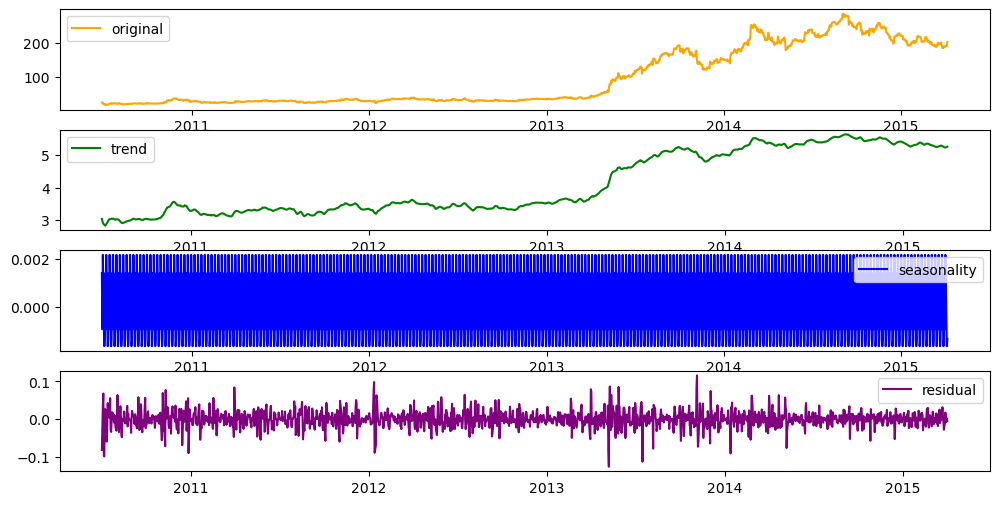

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(train, color='orange', label ='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, color='green', label ='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonality, color='blue', label ='seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, color='purple', label ='residual')
plt.legend(loc='best')
plt.show()

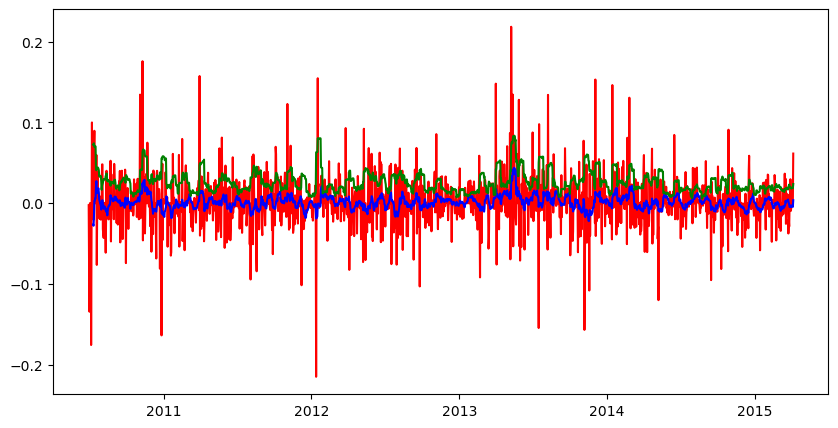

In [23]:
from statsmodels.tsa.stattools import acf, pacf
train.sort_index(inplace=True)
log_diff = log_data- log_data.shift()
rolling_log_mean = log_diff.rolling(12).mean()
rolling_log_std = log_diff.rolling(12).std()
plt.figure(figsize= (10,5))
plt.plot(log_diff, color= 'r', label= 'original')
plt.plot(rolling_log_mean, color= 'blue', label= 'rolling mean')
plt.plot(rolling_log_std, color= 'green', label= 'rolling std') 
plt.show()

In [24]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(log_diff, nlags=20)
lag_pacf = pacf(log_diff, nlags=20)

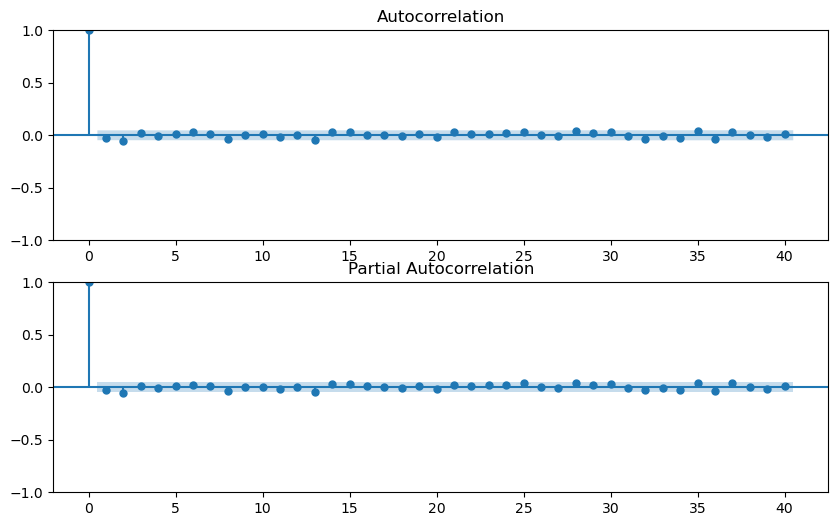

In [25]:
import statsmodels.api as sm
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(log_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(log_diff.dropna(), lags=40, ax=ax2)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


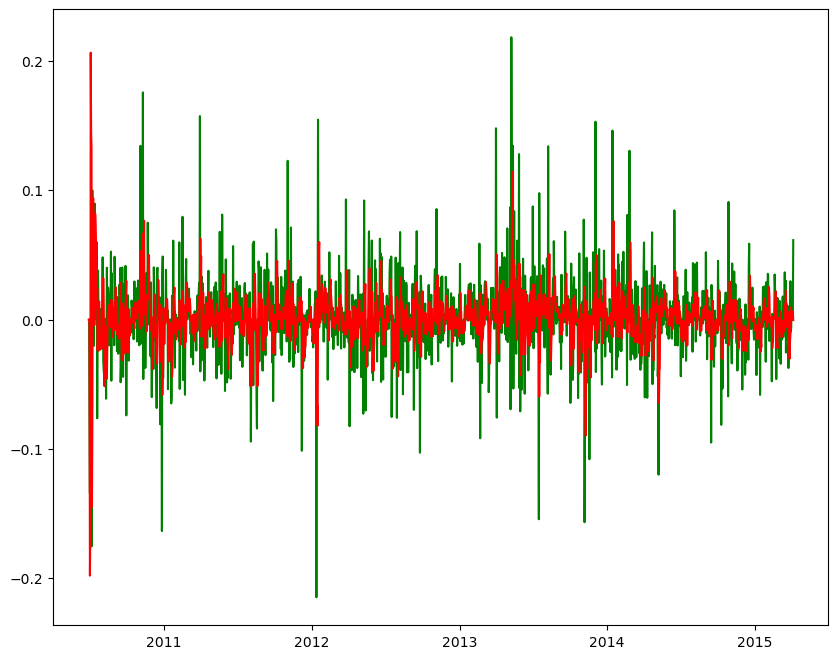

In [26]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(10,8))
model = ARIMA(log_diff, order= (2,3,2))
result_arima= model.fit()
plt.plot(log_diff, color ='green')
plt.plot(result_arima.fittedvalues, color = 'red')
plt.show()

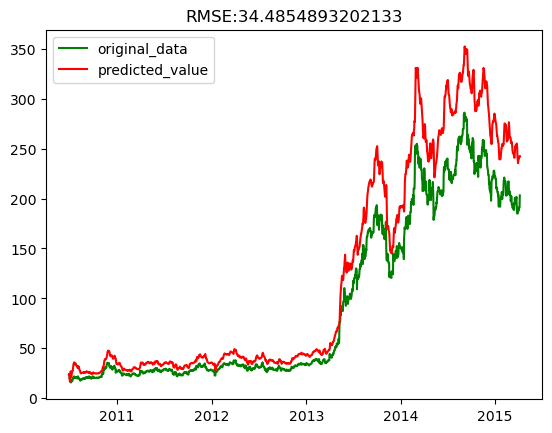

In [27]:
arima_diff_pred = pd.Series(result_arima.fittedvalues, copy = True)
arima_cumulative= arima_diff_pred.cumsum()
arima_log = pd.Series(log_data.iloc[0],index = log_data.index)
arima_log = arima_log.add(arima_cumulative, fill_value = 0)
pred_arima = np.exp(arima_log)

plt.plot(train, color = 'green', label = 'original_data')
plt.plot(pred_arima,color= 'red',label= 'predicted_value')
plt.legend()
plt.title("RMSE:"+str(np.sqrt((sum((pred_arima-train)**2))/len(train))))
plt.show()